In [1]:
#Import modules
import pandas as pd
import numpy as np
import random as rd
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset "dataset.csv"

In [3]:
#Read in dataset
df = pd.read_csv("../data/dataset.csv")

#Drop 'Classes' column
df.drop(columns='Classes', inplace=True)

#Print head and shape
print("------------ HEAD -------------\n", df.head())
print("\n----------- SHAPE -------------\n",df.shape)

------------ HEAD -------------
    d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 571-3  d 571-4  d 571-8  d 571-9  
0        0

### 1. Apply PCA for generating 10 principal components and plot the first three components

In [4]:
#Instantiate PCA model with 10 components
pca = PCA(n_components=10)

#Fit the PCA model to the data, transform the data using the fitted PCA model   
components = pca.fit_transform(df)     

#Plot the first three principal components
fig = px.scatter_3d(x=components[:, 0], y=components[:, 1], z=components[:, 2])
fig.update_layout(title='3D representation of PCA1, PCA2 and PCA3',
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3')
    )
fig.show()

In [5]:
n_components = 3

#Instantiate PCA model with 3 components
pca = PCA(n_components=n_components)

#Fit the PCA model to the data, transform the data using the fitted PCA model 
components = pca.fit_transform(df)

#Calculate the total explained variance
total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}

#Create a scatter matrix to show the projections of the first 3 principal components
fig = px.scatter_matrix(
    components,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)       #Don't show plots along the diagonal
fig.show()

### 2. What is the variance (%) covered by first 5 components?  How is this percentage of variance computed? 

The percentage of variance is computed using the explained_variance_ratio_ attribute from the PCA module within the scikit-learn libary. Each principal component corresponds to a value in the pca.explained_variance_ratio_ array. Each element in the array contains the amount of variance for the principal component it is associated with. Here I have multiplied these by 100 so they are expressed as an array of percentages.

In [16]:
#Calculate the percentage of variance explained by the first five principal components
percentage_of_variance = pca.explained_variance_ratio_[:6]* 100

#Round each value to three decimal places
percentage_of_variance_rounded = np.round(percentage_of_variance, decimals=3)

print("Percentage of variance covered by the first five components (by component): \n", percentage_of_variance_rounded)
print("Percentage of variance covered by the first five components (total): \n", percentage_of_variance_rounded[0:5].sum())

Percentage of variance covered by the first five components (by component): 
 [26.846 14.943  8.608  5.368  4.691]
Percentage of variance covered by the first five components (total): 
 60.45600000000001


In [7]:
#This is the same scatter matrix as before, but with the first five principal components rather than 3 

n_components = 5

#Instantiate PCA model with 3 components
pca = PCA(n_components=n_components)

#Fit the PCA model to the data, transform the data using the fitted PCA model 
components = pca.fit_transform(df)

#Calculate the total explained variance
total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}

#Create a scatter matrix to show the projections of the first 3 principal components
fig = px.scatter_matrix(
    components,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)       #Don't show plots along the diagonal
fig.show()

### 3. Is there any correlation between these five components? 



In [8]:
#Calculate the correlation matrix for the first five components
correlation_matrix = np.corrcoef(components[:5])

#Round each value to three decimal places
correlation_matrix = np.round(correlation_matrix, decimals=3)

correlation_matrix

#Correlation is unusually high, it should not be so high after PCA so I will try a different method

array([[1.   , 0.87 , 0.759, 0.664, 0.324],
       [0.87 , 1.   , 0.964, 0.888, 0.717],
       [0.759, 0.964, 1.   , 0.833, 0.754],
       [0.664, 0.888, 0.833, 1.   , 0.727],
       [0.324, 0.717, 0.754, 0.727, 1.   ]])

<Axes: >

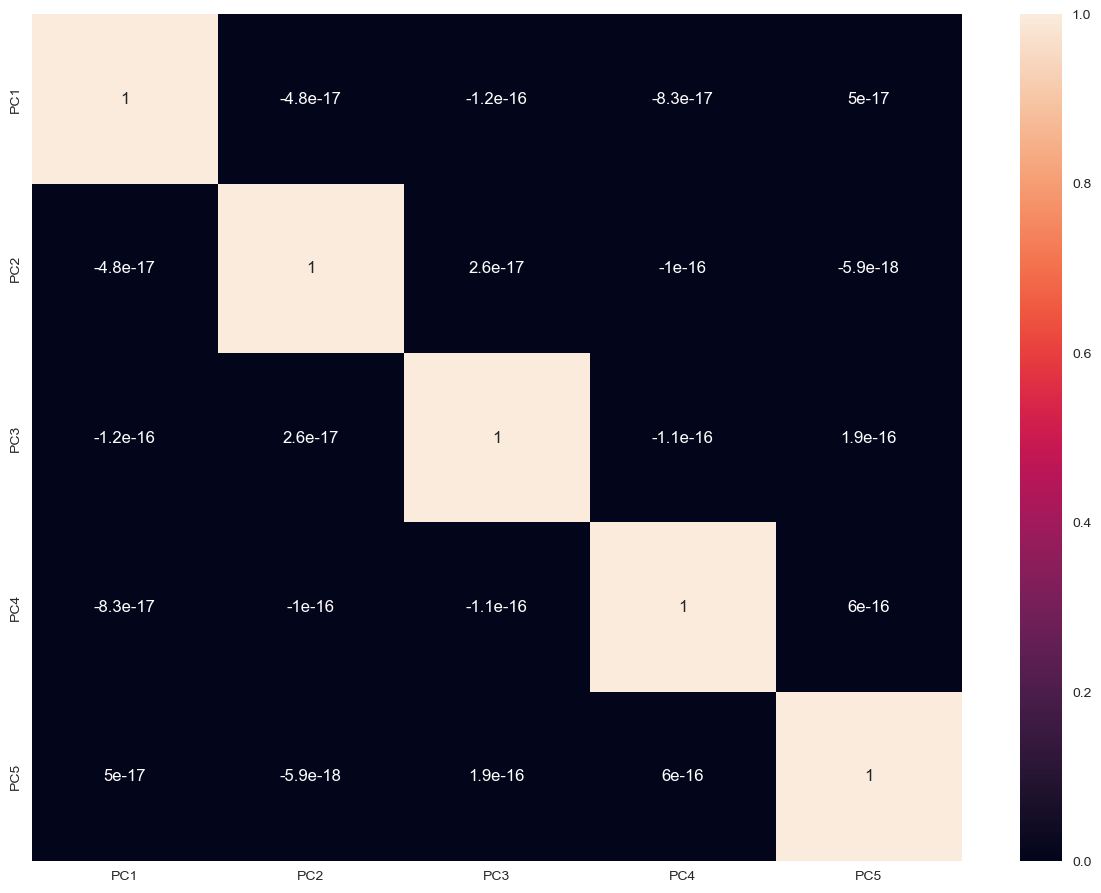

In [9]:
#Instantiate PCA model with 3 components
pca = PCA(n_components=5)

#Fit the PCA model to the data, transform the data using the fitted PCA model 
components = pca.fit_transform(df)

#Create column names and add to dataframe Z
features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
Z = pd.DataFrame(components,columns=features_pca)

#Create a heatmap for the correlation
plt.figure(figsize=(15,11))
sns.heatmap(Z.corr(),annot=True)


#From the heatmap we can see the correlations between the components are very small, showing that there is an insignificant amount of correlation between these components


### 4. Apply t-SNE (method exact) on the same dataset for same number of components used in PCA and plot first three components.

In [10]:
#Apply t-SNE to the first three components
tsne = TSNE(n_components=3, random_state=0)

#Fit the TSNE model to the scaled data (projections is the reduced data)
projections = tsne.fit_transform(df)

#Plot the first three components
fig = px.scatter_3d(x=projections[:, 0], y=projections[:, 1], z=projections[:, 2])
fig.update_layout(title='t-SNE - first 3 principal components',
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3')
    )
fig.show()

### 5. Report the comparison between the kmeans results obtained using t-SNE and PCA.

Kmeans performed on the resulting data from t-SNE and PCA performed similarly, both producing a silhouette score of 0.315 and purity score of 6%.

### Kmeans model (t-SNE reduced data)
Use the elbow method to select the optimum number of clusters, in this case k=2.

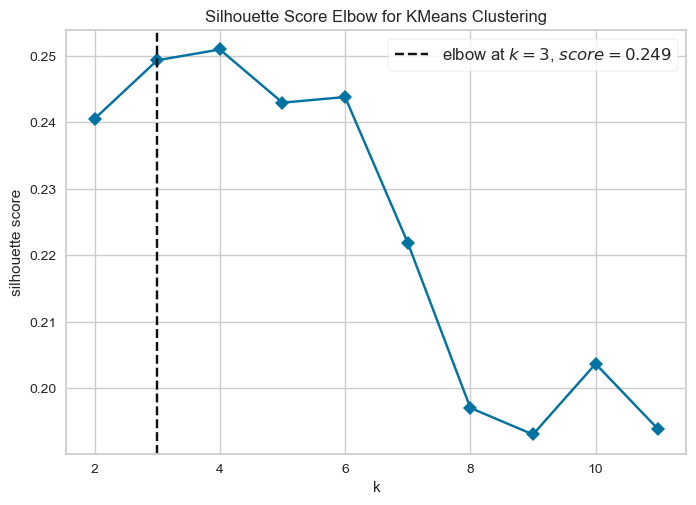

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
#Create a copy of the dataset, set X and Y
X = pd.DataFrame(projections)
Y = X.iloc[:,0] 

#Instantiate clustering model and visualiser
km = KMeans(n_clusters=3)
km_pred = km.fit_predict(X)

visualizer = KElbowVisualizer(
    km, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X)        #Fit the scaled data to the visualiser
visualizer.show() 

### Kmeans performance metrics  (t-SNE reduced data)

In [12]:
#Function to calculate purity score
def purity_score(y_true, y_pred):
    #Compute contingency matrix
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    #Return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

#Calculate silhouette score
score = silhouette_score(X, km.labels_, metric='euclidean')
print("Silhouette score: ", np.round(score, decimals=3))

#Calculate performance metrics - purity score and classification report
kmeans_purity_score = purity_score(Y, km_pred)
print("purity score: ", format(kmeans_purity_score, ".0%"))
#print(classification_report(Y, km_pred))

Silhouette score:  0.194
purity score:  4%


### Kmeans model (PCA reduced data)

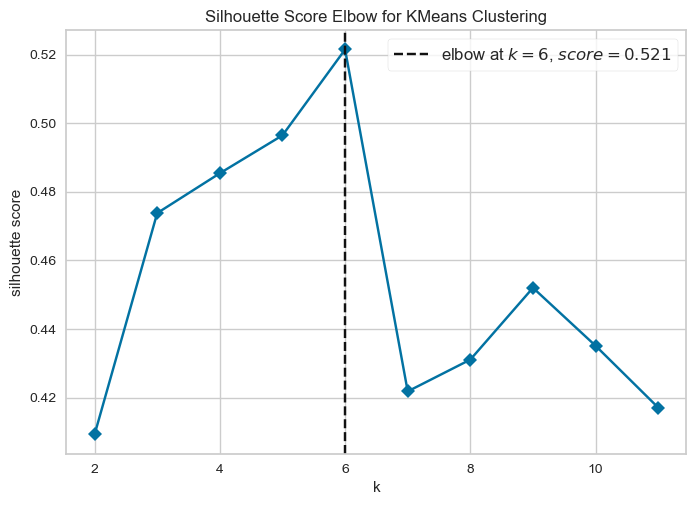

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [13]:
#Create a copy of the dataset, set X and Y
X1 = pd.DataFrame(components)
Y1 = X.iloc[:,0] 

#Instantiate clustering model and visualiser
km1 = KMeans(n_clusters=3)
km_pred1 = km1.fit_predict(X1)

visualizer1 = KElbowVisualizer(
    km1, k=(2,12), metric='silhouette', timings=False
)

visualizer1.fit(X1)        #Fit the scaled data to the visualiser
visualizer1.show() 

### Kmeans performance metrics  (PCA reduced data)

In [14]:
#Calculate silhouette score
score1 = silhouette_score(X1, km1.labels_, metric='euclidean')
print("Silhouette score: ", np.round(score, decimals=3))

#Calculate performance metrics - purity score and classification report
kmeans_purity_score1 = purity_score(Y1, km_pred1)
print("purity score: ", format(kmeans_purity_score1, ".0%"))

Silhouette score:  0.194
purity score:  4%


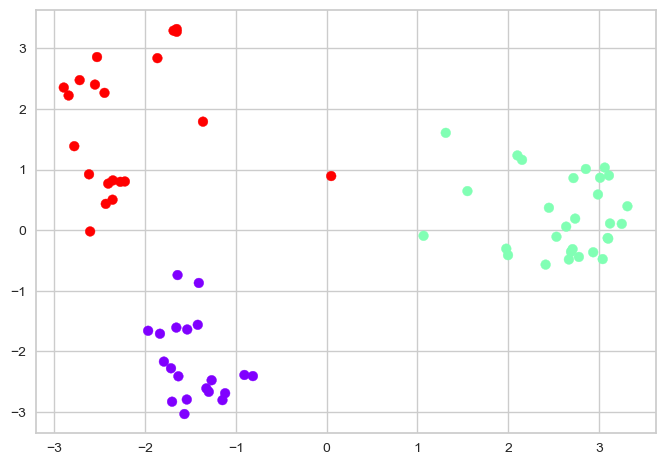

In [15]:
#Plot the clusters
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], c=km_pred1, cmap='rainbow')
plt.show()